In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comment-category-prediction-challenge/Sample.csv
/kaggle/input/comment-category-prediction-challenge/train.csv
/kaggle/input/comment-category-prediction-challenge/test.csv


# Milestone 1 | deadline Feb 3, 2026

# Data loading ---> EDA(Data visualization --> Statical analysis) ---> Train-Validation Split ---> Data Cleaning/Preprocessing ----> Building a baseline model

In [2]:
import pandas as pd
import numpy as np


#--------------Visulization--------------------#

import matplotlib.pyplot as plt
import seaborn as sns

#---------------Text cleaning-----------------#
import re


#---------------Machine Learning Tools--------#

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#------------To combine sparse (text) + dense(numeric) features-----
from scipy.sparse import hstack



# 2. Loading.... Dataset

In [3]:
# Loadig...training data
train = pd.read_csv("/kaggle/input/comment-category-prediction-challenge/train.csv")

# Loading... test data
test = pd.read_csv('/kaggle/input/comment-category-prediction-challenge/test.csv')

In [4]:
print(train.shape)
train.head()

(198000, 15)


,created_date,post_id,emoticon_1,emoticon_2,emoticon_3,upvote,downvote,if_1,if_2,race,religion,gender,disability,comment,label
0,2024-01-18 08:43:57.397508+00:00,73,0,0,0,0,1,0,10,NaN,NaN,NaN,False,She might be a bright spot for a party keou on...,2
1,2024-03-24 21:43:11.490017+00:00,39,0,0,0,6,0,0,4,NaN,NaN,NaN,False,"Under Alaska law, a non-tribal member is not b...",0
2,2024-04-24 20:32:17.014931+00:00,31,0,1,1,0,0,0,10,NaN,NaN,NaN,False,in the future please spare me your strawman dr...,2
3,2023-05-28 22:00:14.214527+00:00,39,0,0,0,5,0,0,10,NaN,NaN,NaN,False,"PS: That should have been ""rot"" instead of ""co...",2
4,2023-09-09 23:12:05.689498+00:00,39,0,0,0,0,0,0,10,NaN,NaN,NaN,False,"Today, the confederate flag...tomorrow, the na...",2


In [5]:
print(test.shape)
test.head()

(102000, 14)


,created_date,post_id,emoticon_1,emoticon_2,emoticon_3,upvote,downvote,if_1,if_2,race,religion,gender,disability,comment
0,2024-02-08 13:13:27.998156+00:00,72,2,0,0,4,1,0,10,NaN,NaN,NaN,False,Canada is being run by someone with the mental...
1,2024-03-01 23:33:25.547123+00:00,123,0,0,0,0,0,0,10,NaN,NaN,NaN,False,And your comment is left-wing drivel
2,2024-02-09 21:52:48.426303+00:00,120,0,0,0,3,0,0,4,NaN,NaN,NaN,False,http://talkingpointsmemo..com/dc/special-couns...
3,2024-02-17 03:43:02.980294+00:00,123,0,0,0,0,0,0,4,NaN,NaN,NaN,False,"Trump jl Blames: The Secret Service, James Com..."
4,2024-04-24 02:27:57.145155+00:00,123,0,0,0,0,0,0,11,NaN,NaN,NaN,False,It was hard enough to get the stench out of th...


# 3. Exploratatory Data Analysis(EDA)

In [6]:
# Dataset structure 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198000 entries, 0 to 197999
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   created_date  198000 non-null  object
 1   post_id       198000 non-null  int64 
 2   emoticon_1    198000 non-null  int64 
 3   emoticon_2    198000 non-null  int64 
 4   emoticon_3    198000 non-null  int64 
 5   upvote        198000 non-null  int64 
 6   downvote      198000 non-null  int64 
 7   if_1          198000 non-null  int64 
 8   if_2          198000 non-null  int64 
 9   race          52577 non-null   object
 10  religion      52577 non-null   object
 11  gender        52577 non-null   object
 12  disability    198000 non-null  bool  
 13  comment       197999 non-null  object
 14  label         198000 non-null  int64 
dtypes: bool(1), int64(9), object(5)
memory usage: 21.3+ MB


In [7]:
# -----------checking missing values---------#

train.isnull().sum()

created_date         0
post_id              0
emoticon_1           0
emoticon_2           0
emoticon_3           0
upvote               0
downvote             0
if_1                 0
if_2                 0
race            145423
religion        145423
gender          145423
disability           0
comment              1
label                0
dtype: int64

In [8]:
# ---------Traget's lables Distribution---------#

train["label"].value_counts()

label
0    114173
2     62440
1     15918
3      5469
Name: count, dtype: int64

# 4. Visualization

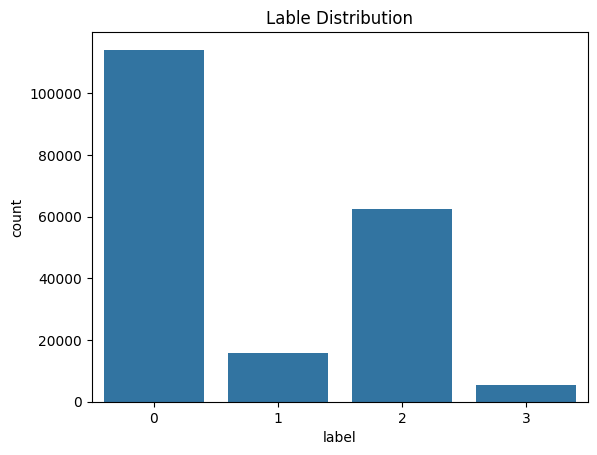

In [9]:
# -----------Visualize label balance-----------# 
sns.countplot(x="label", data=train)
plt.title("Lable Distribution")
plt.show()

# 5. Text Cleaning 

In [10]:
def clean_text(text):
    
    text=str(text).lower()
    text=re.sub(r"http\S+","",text)        # remove urls
    text=re.sub(r"[^a-z0-9\s]", " ", text) # only latters and numbers
    text = re.sub(r"\s+", " ", text)       # remove extra spaces
    return text.strip()

In [11]:
# Apply cleaing 
train["comment"] = train["comment"].fillna("").apply(clean_text)
test["comment"] = test["comment"].fillna("").apply(clean_text)

# 6 Train_Validation Split

In [12]:
# Seprate features and target
X = train.drop(columns=['label'])
y = train['label']

In [13]:
# Stratified split to keep label proportions intact

X_train, X_val, y_train, y_val = train_test_split(

    X,
    y, 
    test_size = 0.2,
    random_state=42,
    stratify = y 
)

# 7. Text ---> Numbers (TF-IDF Vectorization)

In [14]:
# Convert text into numerical features

tfidf = TfidfVectorizer(

    max_features = 5000,        # Limit vocabulary size
    ngram_range = (1,2),         # unigrams + bigrams
    stop_words = "english"      # remove common words
)



In [15]:
# Fit on training text, transform both train and validation
X_train_text = tfidf.fit_transform(X_train["comment"])
X_val_text = tfidf.transform(X_val["comment"])

# 8. Numeric and Binary Features


In [16]:
# Columns that are already numeric / binary
num_cols = [
    "emoticon_1", "emoticon_2", "emoticon_3",
    "upvote", "downvote",
    "if_1", "if_2",
    "race", "religion", "gender", "disability"
]

# Fill missing values with 0
X_train_num = X_train[num_cols].fillna(0).values
X_val_num = X_val[num_cols].fillna(0).values

In [17]:
print(X_train_num.dtype)

object


# 9. Text + Numeric Features

In [18]:
# combine sparse TF-IDF matrix with numeric features
from scipy.sparse import csr_matrix, hstack
import pandas as pd
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Convert object dtype arrays to numeric, coercing errors and filling NaNs
# This handles the 'race', 'religion', 'gender' columns which might contain strings
X_train_num_processed = pd.DataFrame(X_train_num).apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).values
X_val_num_processed = pd.DataFrame(X_val_num).apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).values

# Scale numerical features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num_processed)
X_val_num_scaled = scaler.transform(X_val_num_processed)

X_train_final = hstack([X_train_text, X_train_num_scaled]) # Use scaled numerical features
X_val_final = hstack([X_val_text, X_val_num_scaled])     # Use scaled numerical features

 # 10. Train Baseline Model

In [19]:
# Logistic Regression is fast, stable, and interpretable
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train_final, y_train)


LogisticRegression(max_iter=1000)

# 11. Model Evaluation


In [20]:
# prediction on validation set

y_pred = model.predict(X_val_final)

In [21]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.9016414141414142
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     22835
           1       0.79      0.70      0.74      3183
           2       0.84      0.91      0.87     12488
           3       0.72      0.44      0.55      1094

    accuracy                           0.90     39600
   macro avg       0.83      0.75      0.78     39600
weighted avg       0.90      0.90      0.90     39600



# 12. Train on Full Data & Predict Test

In [22]:
# Vectorize full training text
full_text = tfidf.fit_transform(train["comment"])

# Process and scale full training numerical features
full_num_processed = pd.DataFrame(train[num_cols]).apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).values
full_num_scaled = scaler.transform(full_num_processed) # Use the already fitted scaler

# Combine features
X_full = hstack([full_text, full_num_scaled])

# Retrain model on full dataset
model.fit(X_full, y)

# Prepare test data
test_text = tfidf.transform(test["comment"])

# Process and scale test numerical features
test_num_processed = pd.DataFrame(test[num_cols]).apply(pd.to_numeric, errors='coerce').fillna(0).astype(float).values
X_test_final = hstack([test_text, scaler.transform(test_num_processed)]) # Scale test_num using the same scaler

# Predict labels for test set
test_preds = model.predict(X_test_final)


# 13. Create Submission File

In [23]:
import pandas as pd

# Load sample submission file
sample_submission = pd.read_csv("/kaggle/input/comment-category-prediction-challenge/Sample.csv")


In [24]:
submission = pd.DataFrame({
    "ID": sample_submission["ID"],
    "label": test_preds
})

submission.to_csv("submission.csv", index=False)
